In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
card_df = pd.read_csv('./data/credit/creditcard.csv')
card_df.head(3)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0


In [3]:
card_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [4]:
def get_preprocessed_df(df=None):
    df_copy = df.copy()
    df_copy.drop('Time', axis=1, inplace=True)
    return df_copy

In [7]:
from sklearn.model_selection import train_test_split

def get_train_test_dataset(df=None):
    
    df_copy = get_preprocessed_df(df)
  
    X_features = df_copy.iloc[:,:-1]
    y_label = df_copy.iloc[:,-1]
    
   
    X_train, X_test, y_train, y_test=\
    train_test_split(
        X_features
        , y_label
        , test_size=0.3
        , random_state=0
        , stratify=y_label 
    )
    return X_train, X_test, y_train, y_test


In [8]:
X_train, X_test, y_train, y_test = \
get_train_test_dataset(card_df) 

In [9]:
y_train.shape 

(199364,)

In [10]:
y_train.value_counts() 

0    199020
1       344
Name: Class, dtype: int64

In [11]:
y_train.value_counts() / y_train.shape[0] * 100

0    99.827451
1     0.172549
Name: Class, dtype: float64

In [12]:
y_test.value_counts() / y_test.shape[0] * 100

0    99.826785
1     0.173215
Name: Class, dtype: float64

In [13]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score

def get_clf_eval(y_test, pred):
    confusion = confusion_matrix(y_test, pred)
    accu = accuracy_score(y_test, pred)
    prec = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    
    auc = roc_auc_score(y_test, pred)
    print('오차행렬')
    print(confusion)
    
    out_str = '정확도 : {0:.4f}, 정밀도 : {1:.4f},\
    재현율 : {2:.4f}, AUC : {3:.4f}'
    
    print(out_str.format(accu, prec, recall, auc))


In [14]:
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)
get_clf_eval(y_test, lr_pred)

오차행렬
[[85282    13]
 [   57    91]]
정확도 : 0.9992, 정밀도 : 0.8750,    재현율 : 0.6149, AUC : 0.8074


In [15]:
def get_model_train_eval(model, ftr_train=None,ftr_test=None, tgt_train=None, tgt_test=None):
    model.fit(ftr_train, tgt_train) # 학습
    pred = model.predict(ftr_test) # 예측값 추출
    get_clf_eval(tgt_test,pred) # 성능 평가

In [16]:
from lightgbm import LGBMClassifier

lgbm_clf = LGBMClassifier(
      n_estimators=1000
    , num_leaves=64 # 결정 노드 64
    , n_jobs=-1 # 모든 코어 사용 = 병렬처리
    , boost_from_average=False # 재현율과 AUC 성능 높이기 위해
)
get_model_train_eval(lgbm_clf
                     , ftr_train=X_train
                     , ftr_test=X_test
                     , tgt_train=y_train
                     , tgt_test=y_test
)

오차행렬
[[85290     5]
 [   36   112]]
정확도 : 0.9995, 정밀도 : 0.9573,    재현율 : 0.7568, AUC : 0.8783


#### 데이터 분포도 변환 후 모델 학습/예측/ 평가

In [17]:
card_df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.165980e-15,3.416908e-16,-1.373150e-15,2.086869e-15,9.604066e-16,1.490107e-15,-5.556467e-16,1.177556e-16,-2.406455e-15,...,1.656562e-16,-3.444850e-16,2.578648e-16,4.471968e-15,5.340915e-16,1.687098e-15,-3.666453e-16,-1.220404e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


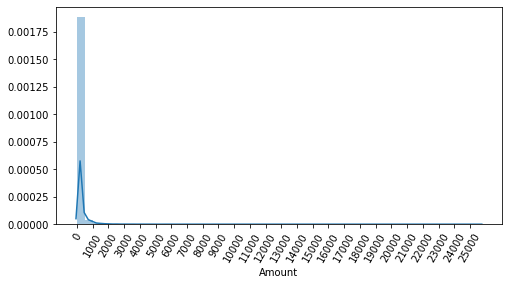

In [19]:
import seaborn as sns

plt.figure(figsize=(8,4))
plt.xticks(range(0,26000,1000), rotation=60)
sns.distplot(card_df['Amount'])

In [20]:
from sklearn.preprocessing import StandardScaler

def get_preprocessed_df(df=None):
    df_copy = df.copy()
    scaler = StandardScaler()
    amount_n = scaler.fit_transform(
        df_copy['Amount'].values.reshape(-1,1) 
    )

    df_copy.insert(0, 'Amount_Scaled', amount_n)
    df_copy.drop(['Time', 'Amount'], axis=1, inplace=True)
    return df_copy

In [21]:
df_copy = get_preprocessed_df(card_df)
df_copy.describe()

,Amount_Scaled,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
count,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000
mean,2.913952e-17,1.165980e-15,3.416908e-16,-1.373150e-15,2.086869e-15,9.604066e-16,1.490107e-15,-5.556467e-16,1.177556e-16,-2.406455e-15,...,6.406703e-16,1.656562e-16,-3.444850e-16,2.578648e-16,4.471968e-15,5.340915e-16,1.687098e-15,-3.666453e-16,-1.220404e-16,0.001727
std,1.000002e+00,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,0.041527
min,-3.532294e-01,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000
25%,-3.308401e-01,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,0.000000
50%,-2.652715e-01,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,0.000000
75%,-4.471707e-02,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,0.000000
max,1.023622e+02,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,1.000000


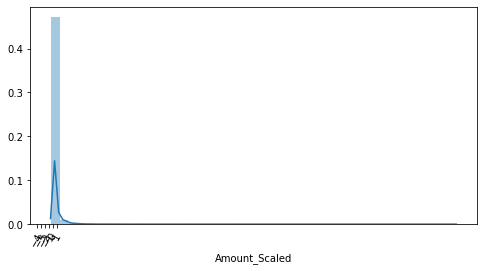

In [24]:
plt.figure(figsize=(8,4))
plt.xticks(range(-4,2,1), rotation=60) 
sns.distplot(df_copy['Amount_Scaled'])

In [25]:
X_train, X_test, y_train, y_test = \
get_train_test_dataset(card_df)
print('#### 로지스틱 회귀 예측 성능')
lr_clf = LogisticRegression()
get_model_train_eval(
      lr_clf
    , ftr_train=X_train
    , ftr_test=X_test
    , tgt_train=y_train
    , tgt_test=y_test
)
# 정확도 : 0.9992, 정밀도 : 0.8750,    
# 재현율 : 0.6149, AUC : 0.8074

#### 로지스틱 회귀 예측 성능
오차행렬
[[85281    14]
 [   58    90]]
정확도 : 0.9992, 정밀도 : 0.8654,    재현율 : 0.6081, AUC : 0.8040


In [26]:
print('#### LightGBM 예측 성능 ####')
lgbm_clf = LGBMClassifier(
      n_estimators=1000
    , num_leaves=64 # 결정 노드 64
    , n_jobs=-1 # 모든 코어 사용 = 병렬처리
    , boost_from_average=False # 재현율과 AUC 성능 높이기 위해
)
get_model_train_eval(lgbm_clf
                     , ftr_train=X_train
                     , ftr_test=X_test
                     , tgt_train=y_train
                     , tgt_test=y_test
)
# 정확도 : 0.9995, 정밀도 : 0.9573,    
# 재현율 : 0.7568, AUC : 0.8783

#### LightGBM 예측 성능 ####
오차행렬
[[85290     5]
 [   37   111]]
정확도 : 0.9995, 정밀도 : 0.9569,    재현율 : 0.7500, AUC : 0.8750


In [27]:
def get_preprocessed_df(df=None):
    df_copy = df.copy()
    amount_n = np.log1p(df_copy['Amount'])
    df_copy.insert(0, 'Amount_Scaled', amount_n)
    df_copy.drop(['Time', 'Amount'], axis=1, inplace=True)
    return df_copy

In [28]:
df_copy = get_preprocessed_df(card_df)
df_copy.describe()

,Amount_Scaled,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000
mean,3.152188,1.165980e-15,3.416908e-16,-1.373150e-15,2.086869e-15,9.604066e-16,1.490107e-15,-5.556467e-16,1.177556e-16,-2.406455e-15,...,6.406703e-16,1.656562e-16,-3.444850e-16,2.578648e-16,4.471968e-15,5.340915e-16,1.687098e-15,-3.666453e-16,-1.220404e-16,0.001727
std,1.656648,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000
25%,1.887070,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,0.000000
50%,3.135494,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,0.000000
75%,4.358822,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,0.000000
max,10.153941,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,1.000000


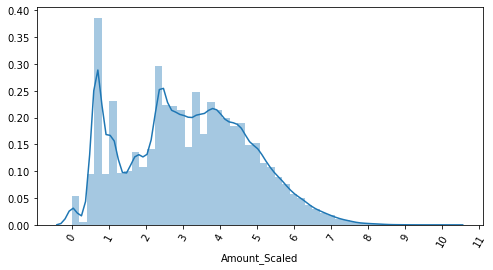

In [29]:
plt.figure(figsize=(8,4))
plt.xticks(range(0,12,1), rotation=60) 
sns.distplot(df_copy['Amount_Scaled'])

In [30]:
X_train, X_test, y_train, y_test = \
get_train_test_dataset(card_df)

print('#### 로지스틱 회귀 예측 성능')
lr_clf = LogisticRegression()
get_model_train_eval(
      lr_clf
    , ftr_train=X_train
    , ftr_test=X_test
    , tgt_train=y_train
    , tgt_test=y_test
)
# 정확도 : 0.9992, 정밀도 : 0.8750,    
# 재현율 : 0.6149, AUC : 0.8074

#### 로지스틱 회귀 예측 성능
오차행렬
[[85283    12]
 [   59    89]]
정확도 : 0.9992, 정밀도 : 0.8812,    재현율 : 0.6014, AUC : 0.8006


In [31]:
print('#### LightGBM 예측 성능 ####')
lgbm_clf = LGBMClassifier(
      n_estimators=1000
    , num_leaves=64 # 결정 노드 64
    , n_jobs=-1 # 모든 코어 사용 = 병렬처리
    , boost_from_average=False # 재현율과 AUC 성능 높이기 위해
)
get_model_train_eval(lgbm_clf
                     , ftr_train=X_train
                     , ftr_test=X_test
                     , tgt_train=y_train
                     , tgt_test=y_test
)
# 정확도 : 0.9995, 정밀도 : 0.9573,    
# 재현율 : 0.7568, AUC : 0.8783

#### LightGBM 예측 성능 ####
오차행렬
[[85290     5]
 [   35   113]]
정확도 : 0.9995, 정밀도 : 0.9576,    재현율 : 0.7635, AUC : 0.8817


### 이상치 데이터 제거 후 모델 학습/예측/평가

In [32]:
import seaborn as sns

corr = card_df.corr()
corr

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,1.173963e-01,-1.059333e-02,-4.196182e-01,-1.052602e-01,1.730721e-01,-6.301647e-02,8.471437e-02,-3.694943e-02,-8.660434e-03,...,4.473573e-02,1.440591e-01,5.114236e-02,-1.618187e-02,-2.330828e-01,-4.140710e-02,-5.134591e-03,-9.412688e-03,-0.010596,-0.012323
V1,0.117396,1.000000e+00,4.697350e-17,-1.424390e-15,1.755316e-17,6.391162e-17,2.398071e-16,1.991550e-15,-9.490675e-17,2.169581e-16,...,-1.755072e-16,7.477367e-17,9.808705e-16,7.354269e-17,-9.805358e-16,-8.621897e-17,3.208233e-17,9.820892e-16,-0.227709,-0.101347
V2,-0.010593,4.697350e-17,1.000000e+00,2.512175e-16,-1.126388e-16,-2.039868e-16,5.024680e-16,3.966486e-16,-4.413984e-17,-5.728718e-17,...,8.444409e-17,2.500830e-16,1.059562e-16,-8.142354e-18,-4.261894e-17,2.601622e-16,-4.478472e-16,-3.676415e-16,-0.531409,0.091289
V3,-0.419618,-1.424390e-15,2.512175e-16,1.000000e+00,-3.416910e-16,-1.436514e-15,1.431581e-15,2.168574e-15,3.433113e-16,-4.233770e-16,...,-2.971969e-17,4.648259e-16,2.115206e-17,-9.351637e-17,4.771164e-16,6.521501e-16,6.239832e-16,7.726948e-16,-0.210880,-0.192961
V4,-0.105260,1.755316e-17,-1.126388e-16,-3.416910e-16,1.000000e+00,-1.940929e-15,-2.712659e-16,1.556330e-16,5.195643e-16,3.859585e-16,...,-9.976950e-17,2.099922e-16,6.002528e-17,2.229738e-16,5.394585e-16,-6.179751e-16,-6.403423e-17,-5.863664e-17,0.098732,0.133447
V5,0.173072,6.391162e-17,-2.039868e-16,-1.436514e-15,-1.940929e-15,1.000000e+00,7.926364e-16,-4.209851e-16,7.589187e-16,4.205206e-16,...,-1.368701e-16,5.060029e-16,1.637596e-16,-9.286095e-16,5.625102e-16,9.144690e-16,4.465960e-16,-3.299167e-16,-0.386356,-0.094974
V6,-0.063016,2.398071e-16,5.024680e-16,1.431581e-15,-2.712659e-16,7.926364e-16,1.000000e+00,1.429426e-16,-1.707421e-16,1.114447e-16,...,-1.575903e-16,-3.362902e-16,-7.232186e-17,-1.261867e-15,1.081933e-15,-2.378414e-16,-2.623818e-16,4.813155e-16,0.215981,-0.043643
V7,0.084714,1.991550e-15,3.966486e-16,2.168574e-15,1.556330e-16,-4.209851e-16,1.429426e-16,1.000000e+00,-8.691834e-17,7.933251e-16,...,1.938604e-16,-1.058131e-15,2.327911e-16,-2.589727e-17,1.174169e-15,-7.334507e-16,-5.886825e-16,-6.836764e-17,0.397311,-0.187257
V8,-0.036949,-9.490675e-17,-4.413984e-17,3.433113e-16,5.195643e-16,7.589187e-16,-1.707421e-16,-8.691834e-17,1.000000e+00,2.900829e-16,...,-2.412439e-16,5.475559e-16,3.897104e-16,-1.802967e-16,-1.390791e-16,-1.209975e-16,1.733633e-16,-4.484325e-16,-0.103079,0.019875
V9,-0.008660,2.169581e-16,-5.728718e-17,-4.233770e-16,3.859585e-16,4.205206e-16,1.114447e-16,7.933251e-16,2.900829e-16,1.000000e+00,...,4.578389e-17,2.871855e-17,5.929286e-16,-2.346385e-16,1.099645e-15,-1.388725e-15,-2.287414e-16,9.146779e-16,-0.044246,-0.097733


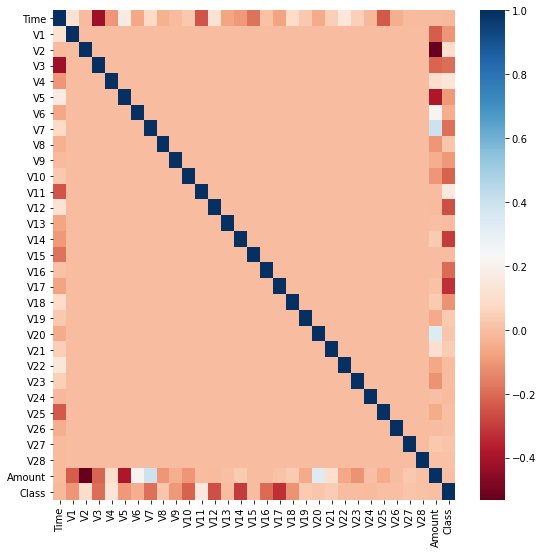

In [33]:
plt.figure(figsize=(9,9))
sns.heatmap(corr, cmap='RdBu')

In [34]:
def get_outlier(df=None, col=None, weight=1.5):
    fraud = df[df['Class']==1][col]
    q_25 = np.percentile(fraud.values,25)
    q_75 = np.percentile(fraud.values,75)
    iqr = q_75-q_25 # 범위
    iqr_weight = iqr * weight # 1.5배
    low_val = q_25 - iqr_weight # 최소값
    high_val = q_75 + iqr_weight # 최대값
    out_index = fraud[(fraud < low_val)|(fraud>high_val)].index
    return out_index


In [37]:
out_index_14 = get_outlier(df=card_df, col='V14') 
print('이상치 데이터 인덱스 : ', out_index)

이상치 데이터 인덱스 :  Int64Index([], dtype='int64')


In [38]:
out_index_17 = get_outlier(df=card_df, col='V17') 
print('이상치 데이터 인덱스 : ', out_index)

이상치 데이터 인덱스 :  Int64Index([], dtype='int64')


In [39]:
def get_preprocessed_df(df=None):
    df_copy = df.copy()
    amount_n = np.log1p(df_copy['Amount'])
    df_copy.insert(0, 'Amount_Scaled', amount_n)
    df_copy.drop(['Time', 'Amount'], axis=1, inplace=True)
    out_index = get_outlier(df=df_copy, col='V14')
    df_copy.drop(out_index, axis=0, inplace=True)
    return df_copy


In [40]:
X_train, X_test, y_train, y_test = \
get_train_test_dataset(card_df)

print('#### 로지스틱 회귀 예측 성능')
lr_clf = LogisticRegression()
get_model_train_eval(
      lr_clf
    , ftr_train=X_train
    , ftr_test=X_test
    , tgt_train=y_train
    , tgt_test=y_test
)
# 정확도 : 0.9992, 정밀도 : 0.8750,    
# 재현율 : 0.6149, AUC : 0.8074

#### 로지스틱 회귀 예측 성능
오차행렬
[[85281    14]
 [   48    98]]
정확도 : 0.9993, 정밀도 : 0.8750,    재현율 : 0.6712, AUC : 0.8355


In [41]:
print('#### LightGBM 예측 성능 ####')
lgbm_clf = LGBMClassifier(
      n_estimators=1000
    , num_leaves=64 # 결정 노드 64
    , n_jobs=-1 # 모든 코어 사용 = 병렬처리
    , boost_from_average=False # 재현율과 AUC 성능 높이기 위해
)
get_model_train_eval(lgbm_clf
                     , ftr_train=X_train
                     , ftr_test=X_test
                     , tgt_train=y_train
                     , tgt_test=y_test
)
# 정확도 : 0.9995, 정밀도 : 0.9573,    
# 재현율 : 0.7568, AUC : 0.8783

#### LightGBM 예측 성능 ####
오차행렬
[[85290     5]
 [   25   121]]
정확도 : 0.9996, 정밀도 : 0.9603,    재현율 : 0.8288, AUC : 0.9144


#### 오버 샘플링 적용 후 모델 학습/예측/평가

In [42]:
from imblearn.over_sampling import SMOTE

In [43]:
smote = SMOTE(random_state=0)
X_train_over, y_train_over = \
smote.fit_sample(X_train, y_train)

In [44]:
X_train.shape, y_train.shape

((199362, 29), (199362,))

In [45]:
y_train.value_counts()

0    199020
1       342
Name: Class, dtype: int64

In [46]:
X_train_over.shape, y_train_over.shape

((398040, 29), (398040,))

In [47]:
X_train, X_test, y_train, y_test = \
get_train_test_dataset(card_df)

print('#### 로지스틱 회귀 예측 성능')
lr_clf = LogisticRegression()
get_model_train_eval(
      lr_clf
    , ftr_train=X_train_over
    , ftr_test=X_test
    , tgt_train=y_train_over
    , tgt_test=y_test
)
# 정확도 : 0.9992, 정밀도 : 0.8750,    
# 재현율 : 0.6149, AUC : 0.8074

#### 로지스틱 회귀 예측 성능
오차행렬
[[82937  2358]
 [   11   135]]
정확도 : 0.9723, 정밀도 : 0.0542,    재현율 : 0.9247, AUC : 0.9485
